## analyze supporter No. vs tweeting time

In [89]:
import numpy as np

In [8]:
import csv 
import sys #used for passing in the argument
file_name = sys.argv[1] #filename is argument 1
with open('petitions.csv', 'rU') as f:  #opens PW file
    reader = csv.reader(f)
    #data = list(list(rec) for rec in csv.reader(f, delimiter=',')) #reads csv into a list of lists

#     for row in data:
#         print (row[0]) #this alone will print all the computer names
#         for username in row: #Trying to run another for loop to print the usernames
#             print (username)

/Users/feiwang/anaconda3/envs/py36er/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 'U' mode is deprecated
  after removing the cwd from sys.path.


In [40]:

import csv
import sys
from collections import defaultdict
links = defaultdict(list)
# links = []
with open('petitions.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        links[row[0]] = []
        tweet_links=[]
        target_No=row[-2:-1][0]
        actual_No=row[-1:][0]
        i=0  ##No.retweets
        for element in row[1:-2]:
#             print(element)
            tweet_links.append(element)
            i+=1
        links[row[0]] = [target_No, actual_No,i,tweet_links]

In [41]:
#links['http://www.thepetitionsite.com/790/294/887/china-punish-buyers-of-poached-tiger-body-parts/'][-3:]

key : (links, target_value, actual_value)

In [48]:
import pandas as pd
tweet_df=pd.DataFrame.from_dict(links, orient='index')
tweet_df.reset_index(inplace=True)

In [49]:
tweet_df.columns=['Petition_Url','Goal_No','Actual_No','Retweet_No','Tweet_links']

In [82]:
def str2float(s):
    s = str(s).strip().replace(',','')
#     s = str(s).strip().replace('\s*','')
#     s = re.sub('[^0-9]+', '0', s)
    return float(s)
tweet_df[['Goal_No','Actual_No']]=tweet_df[['Goal_No','Actual_No']].applymap(str2float)
#tweet_df[['Goal_No',]].applymap(str2float).astype(float)
# tweet_df['Goal_No'].apply(lambda x: x.strip().replace(',', '')).astype(float)

In [106]:
tweet_df['Log_goal']=np.log10(tweet_df.Goal_No)
tweet_df['Log_actual']=np.log10(tweet_df.Actual_No)
tweet_df['Log_retweet']=np.log10(tweet_df.Retweet_No)

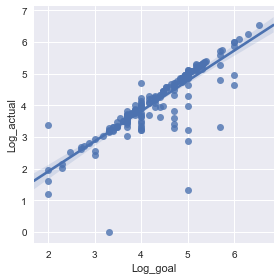

In [100]:
%matplotlib inline
import seaborn as sns

sns.lmplot(x='Log_goal', y='Log_actual',data=tweet_df, size=4)

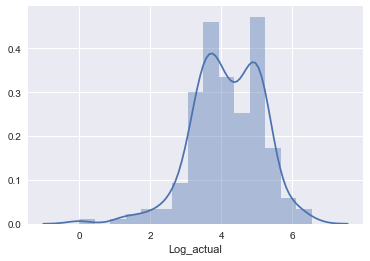

In [104]:
sns.distplot(tweet_df.Log_actual)

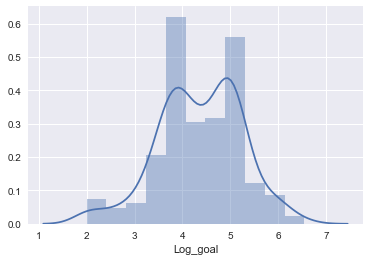

In [105]:
sns.distplot(tweet_df.Log_goal)

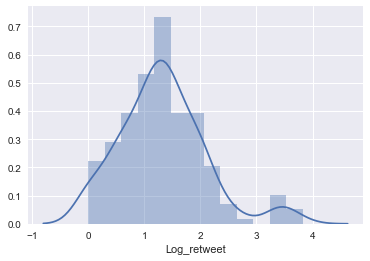

In [107]:
sns.distplot(tweet_df.Log_retweet)

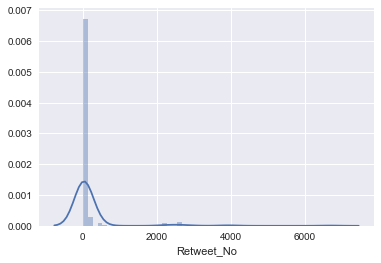

In [102]:
sns.distplot(tweet_df.Retweet_No)

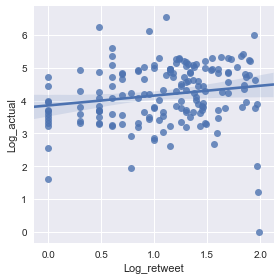

In [131]:
sns.lmplot(x='Log_retweet', y='Log_actual',data=tweet_df.loc[tweet_df.Log_retweet<2], size=4)

In [127]:
tweet_df.query(' Log_retweet < 1.5 & 5 < Log_actual < 6')

,Petition_Url,Goal_No,Actual_No,Retweet_No,Tweet_links,Log_goal,Log_actual,Log_retweet
12,https://you.38degrees.org.uk/petitions/no-priv...,200000.0,138520.0,16,[http://twitter.com/EastCambsGreens/status/563...,5.301030,5.141512,1.204120
26,http://www.thepetitionsite.com/takeaction/673/...,150000.0,145323.0,20,[http://twitter.com/twalt01/status/55858299942...,5.176091,5.162334,1.301030
27,http://www.thepetitionsite.com/350/765/758/dem...,100000.0,111574.0,20,[http://twitter.com/orcafree01/status/56453868...,5.000000,5.047563,1.301030
29,http://www.thepetitionsite.com/takeaction/290/...,125000.0,122632.0,10,[http://twitter.com/KCroyal23/status/559921553...,5.096910,5.088604,1.000000
54,http://www.thepetitionsite.com/765/646/549/ret...,160000.0,156542.0,30,[http://twitter.com/xx4lennoxxx/status/5515479...,5.204120,5.194631,1.477121
62,http://www.thepetitionsite.com/991/631/242/sto...,100000.0,101422.0,10,[http://twitter.com/ujajura/status/57057159069...,5.000000,5.006132,1.000000
64,http://www.thepetitionsite.com/takeaction/875/...,200000.0,196412.0,11,[http://twitter.com/rustygreen59/status/553104...,5.301030,5.293168,1.041393
72,http://www.thepetitionsite.com/takeaction/697/...,150000.0,133806.0,21,[http://twitter.com/B4Sue/status/5594762237019...,5.176091,5.126476,1.322219
79,https://www.sauvonslaforet.org/petitions/982/l...,100000.0,126734.0,25,[http://twitter.com/Eyroine_/status/5607364031...,5.000000,5.102893,1.397940
107,https://www.regenwald.org/aktion/981/nicht-in-...,100000.0,102247.0,24,[http://twitter.com/Binbags4africa/status/5554...,5.000000,5.009651,1.380211


In [133]:
tweet_df.loc[tweet_df.Log_retweet<2].corr()

,Goal_No,Actual_No,Retweet_No,Log_goal,Log_actual,Log_retweet
Goal_No,1.000000,0.943068,0.039089,0.531389,0.450091,0.044402
Actual_No,0.943068,1.000000,0.012362,0.451028,0.451224,0.032375
Retweet_No,0.039089,0.012362,1.000000,0.098901,0.028708,0.841697
Log_goal,0.531389,0.451028,0.098901,1.000000,0.876080,0.208012
Log_actual,0.450091,0.451224,0.028708,0.876080,1.000000,0.173741
Log_retweet,0.044402,0.032375,0.841697,0.208012,0.173741,1.000000


In [112]:
np.argmin(tweet_df.Actual_No)
#65
tweet_df.loc[65,'Petition_Url']

'https://secure.avaaz.org/es/petition/aprobar_la_ley_santa_cruz_libre_de_fracking/'

In [83]:
tweet_df[['Goal_No','Actual_No','Retweet_No']].head(5)

,Goal_No,Actual_No,Retweet_No
0,190000.0,193215.0,35
1,300.0,340.0,2568
2,250000.0,254647.0,69
3,500.0,428.0,14
4,3500.0,3951.0,4
